In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [3]:
'D:\\My Works KG\\Interview_preparation\\Take_home_assessment\\Model\\jupyter_notebooks'.replace('\\','/')

'D:/My Works KG/Interview_preparation/Take_home_assessment/Model/jupyter_notebooks'

### Quality of Voice data

In [227]:
data_path = 'D:/My Works KG/Interview_preparation/Take_home_assessment/Data/Quality_Data/'

In [228]:

dfs = []

for file_name in os.listdir(data_path):
    if file_name.endswith('.csv') and '2019' not in file_name:
        print(file_name)
        file_path = os.path.join(data_path, file_name)
        
        df = pd.read_csv(file_path)
        
        df.columns = df.columns.str.lower().str.replace(' ', '_')
        
        df = df.rename(columns={'calldrop_category' : 'call_drop_category','inout_travelling' : 'in_out_travelling'})

        df['file_name'] = file_name

        dfs.append(df)


combined_df = pd.concat(dfs, ignore_index=True)

combined_df.columns = combined_df.columns.str.lower().str.replace(' ', '_')



April_MyCall_2021.csv
August_MyCall_2021.csv
December_MyCall_2022.csv
January_MyCall_2022.csv
June_MyCall_2021.csv
March_MyCall_2021.csv
May_MyCall_2021.csv
MyCall_Data_April_2020.csv
MyCall_Data_August_2020.csv
MyCall_Data_December_2020.csv
MyCall_Data_February_2020.csv
MyCall_Data_February_2021.csv
MyCall_Data_January_2020.csv
MyCall_Data_January_2021.csv
MyCall_Data_July_2020.csv
MyCall_Data_June_2020.csv
MyCall_Data_March_2020.csv
MyCall_Data_May_2020.csv
MyCall_Data_November_2020.csv
MyCall_Data_October_2020.csv
MyCall_Data_September_2020.csv
October_MyCall_2021.csv
September_MyCall_2021.csv


In [229]:
def rename_file(input_filename):
    match = re.search(r'MyCall_Data_([a-zA-Z]+)_(\d{4})\.csv', input_filename)

    if match:
        month, year = match.groups()
        new_filename = f'{month}_{input_filename.split("_")[0]}_{year}.csv'
        
        return new_filename
    else:
        return input_filename

In [230]:
combined_df['file_name'] = combined_df['file_name'].apply(rename_file)

In [231]:
combined_df['file_name'].value_counts()

January_MyCall_2020.csv      21948
November_MyCall_2020.csv     21167
December_MyCall_2020.csv     20197
February_MyCall_2020.csv     17724
January_MyCall_2021.csv      13652
July_MyCall_2020.csv         13606
March_MyCall_2020.csv        13485
August_MyCall_2020.csv       10534
June_MyCall_2020.csv         10387
May_MyCall_2020.csv          10285
September_MyCall_2020.csv     9954
October_MyCall_2020.csv       9734
April_MyCall_2020.csv         9460
February_MyCall_2021.csv      7530
March_MyCall_2021.csv         6495
April_MyCall_2021.csv         6044
June_MyCall_2021.csv          3988
May_MyCall_2021.csv           3889
August_MyCall_2021.csv        2560
October_MyCall_2021.csv       2244
September_MyCall_2021.csv     2061
December_MyCall_2022.csv      1370
January_MyCall_2022.csv        620
Name: file_name, dtype: int64

In [232]:
def extract_month_year(file_name):
    match = re.match(r'(\w+)_(\w+)_(\d{4}).csv', file_name)
    if match:
        month, _, year = match.groups()
        return f"{month}_{year}"
    else:
        return None

In [233]:
combined_df['month_year'] = combined_df['file_name'].apply(extract_month_year)

In [236]:
combined_df['month'] = combined_df['month_year'].apply(lambda x : x.split('_')[0])

In [237]:
combined_df['year'] = combined_df['month_year'].apply(lambda x : x.split('_')[1])

## detailed Statistical and Visual Analysis

In [239]:
combined_df.head()

,operator,in_out_travelling,network_type,rating,call_drop_category,latitude,longitude,state_name,file_name,month_year,month,year
0,Vodafone,Outdoor,3G,5,Satisfactory,-1.0,-1.0,NaN,April_MyCall_2021.csv,April_2021,April,2021
1,Vodafone,Travelling,3G,5,Satisfactory,-1.0,-1.0,NaN,April_MyCall_2021.csv,April_2021,April,2021
2,Vodafone,Outdoor,2G,5,Satisfactory,-1.0,-1.0,NaN,April_MyCall_2021.csv,April_2021,April,2021
3,Vodafone,Indoor,3G,5,Satisfactory,-1.0,-1.0,NaN,April_MyCall_2021.csv,April_2021,April,2021
4,Vodafone,Travelling,3G,5,Satisfactory,-1.0,-1.0,NaN,April_MyCall_2021.csv,April_2021,April,2021


In [242]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218934 entries, 0 to 218933
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   operator            218934 non-null  object 
 1   in_out_travelling   218934 non-null  object 
 2   network_type        216772 non-null  object 
 3   rating              218934 non-null  int64  
 4   call_drop_category  218934 non-null  object 
 5   latitude            218934 non-null  float64
 6   longitude           218934 non-null  float64
 7   state_name          142686 non-null  object 
 8   file_name           218934 non-null  object 
 9   month_year          218934 non-null  object 
 10  month               218934 non-null  object 
 11  year                218934 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 20.0+ MB


#### Data has 218934 rows with 12 columns and data size is 20 MB.

### Statistical Analysis of Dataframe

In [243]:
## This function prepares summary of dataframe, like summary for numerical columns, summary for categorical columns. Even this function analyse
## for outliers and null values

def get_summary(df, target_col=None):
    stats_df = df.copy()
    stats_num = stats_df.select_dtypes(exclude='object')
    desc_num = stats_num.describe()
    desc_num.reset_index(inplace=True)
    median_dict = desc_num.median().to_dict()
    median_dict['index'] = 'median'
    desc_num = desc_num.append(median_dict, ignore_index=True).round(2)
    if target_col:
        desc_num.drop(target_col, axis=1, inplace=True)
    desc_num.rename(columns={'index':'Statistical Measures'}, inplace=True)
    desc_num.set_index('Statistical Measures', inplace=True)
    desc_num.loc['count'] = desc_num.loc['count'].map(lambda x: "{0:.0f}".format(int(x)) if type(x) != str else x)

    stats_cat = stats_df.select_dtypes(include='object')
    desc_cat = stats_cat.describe()
    desc_cat.reset_index(inplace=True)

    Q1 = stats_num.quantile(0.25)
    Q3 = stats_num.quantile(0.75)
    IQR = Q3 - Q1
    outlier_df = ((stats_num < (Q1 - 1.5 * IQR)) | (stats_num > (Q3 + 1.5 * IQR))).sum().reset_index()
    outlier_df.rename(columns={'index': 'Feature', 0: 'Number of outliers'}, inplace=True)
    null_df = stats_num.isnull().sum().reset_index()
    null_df.rename(columns={'index': 'Feature', 0: 'null_values'}, inplace=True)
    null_df = null_df[null_df['null_values'] > 0]
    null_df['prop_null_values'] = ((null_df['null_values'] / len(stats_num)) * 100)
    null_df_40 = null_df[null_df['prop_null_values'] > 40]
    return {'summary_num': desc_num,'summary_cat':desc_cat, 'outlier_df': outlier_df, 'null_df': null_df,'null_df_40' : null_df_40}


In [244]:
summary_df = get_summary(combined_df)

C:\Users\Gavade\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [246]:
# Statistical summary of numerical columns
summary_df['summary_num']

,rating,latitude,longitude
Statistical Measures,,,
count,218934,218934,218934
mean,3.52,13.41,50.9
std,1.58,11.42,38.26
min,1.0,-1.0,-1.0
25%,2.0,-1.0,-1.0
50%,4.0,17.63,75.37
75%,5.0,22.83,78.75
max,5.0,34.37,103.79
median,3.76,15.52,63.14


In [247]:
# Statistical summary of Categorical columns
summary_df['summary_cat']

,index,operator,in_out_travelling,network_type,call_drop_category,state_name,file_name,month_year,month,year
0,count,218934,218934,216772,218934,142686,218934,218934,218934,218934
1,unique,10,3,4,3,41,23,23,12,3
2,top,RJio,Indoor,4G,Satisfactory,Maharashtra,January_MyCall_2020.csv,January_2020,January,2020
3,freq,67515,151920,154587,149512,28858,21948,21948,36220,168481


1. There are 10 distinct operator available. About 67K records are related to Rjio operator.
2. 4 distince network types are present and 4G has 1.54L records available.
3. In call_drop_category 3 different categories are present.

In [248]:
summary_df['outlier_df']

,Feature,Number of outliers
0,rating,0
1,latitude,0
2,longitude,0


In [249]:
summary_df['null_df_40']

,Feature,null_values,prop_null_values


1. No outliers present in the dataset
2. Not significant amount of null values are present in the dataset

### Univariate analysis

We will do univariate analysis

#### Network operator 

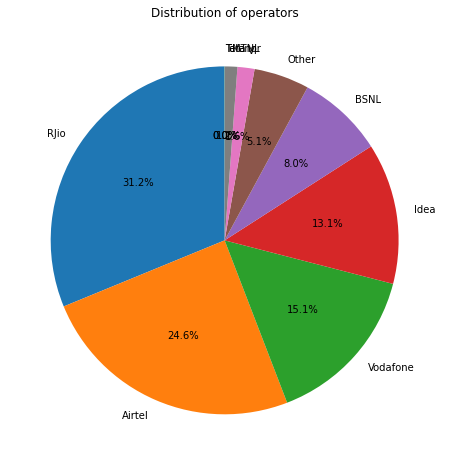

In [55]:
operator_counts = combined_df['operator'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(operator_counts, labels=operator_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of operators')
plt.show()

1. RJio contributes about 32% of the records available which is maximum among other operators followed by Airtel and Vodafone

<AxesSubplot:xlabel='network_type', ylabel='count'>

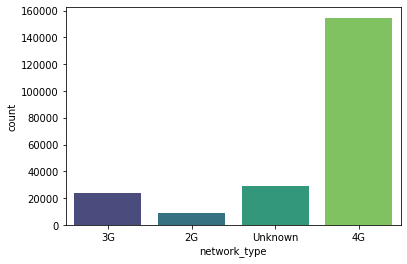

In [251]:
sns.countplot(data=combined_df, x='network_type',palette='viridis')

154587 records are of network type 4G and lesss amount of 2G related records available.

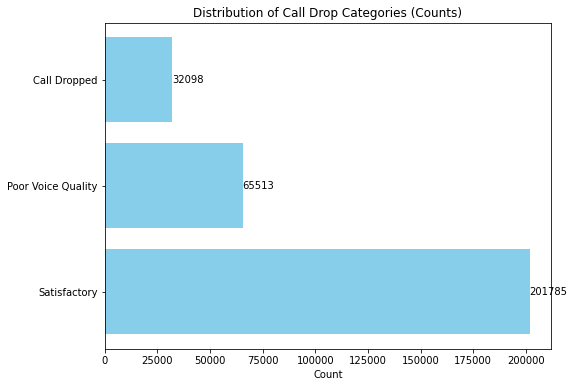

In [65]:
call_drop_category_count = combined_df['call_drop_category'].value_counts()


plt.figure(figsize=(8, 6))
plt.barh(call_drop_category_count.index, call_drop_category_count, color='skyblue')

# Annotate each bar with its count value
for index, value in enumerate(call_drop_category_count):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Distribution of Call Drop Categories (Counts)')
plt.xlabel('Count')
plt.show()

In [68]:
import folium


latitude = combined_df['latitude']
longitude = combined_df['longitude']
locations = list(zip(latitude, longitude))

# Create a folium map centered around the mean of the coordinates
map_center = [sum(latitude) / len(latitude), sum(longitude) / len(longitude)]
my_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each location
for loc in locations:
    folium.Marker(location=loc).add_to(my_map)

# Save the map to an HTML file or display it
my_map.save('map.html')


In [70]:
# my_map

#### Bivariate Analysis

#### Operator with Call drop category

In [252]:
op_df = pd.DataFrame(combined_df['operator'].value_counts(normalize=True).reset_index().rename(columns={'index':'operator','operator':'proportion'}))

In [253]:
op_df

,operator,proportion
0,RJio,0.308381
1,Airtel,0.257055
2,Idea,0.153640
3,Vodafone,0.151352
4,BSNL,0.082180
5,VI,0.021641
6,MTNL,0.014128
7,Other,0.011615
8,Tata,0.000005
9,Telenor,0.000005


In [254]:
op_drop = combined_df.groupby('operator')['call_drop_category'].value_counts(normalize=True)
op_drop_df = op_drop.unstack(fill_value=0)
op_drop_df.sort_values(by='Satisfactory',ascending=False)

call_drop_category,Call Dropped,Poor Voice Quality,Satisfactory
operator,,,
Tata,0.000000,0.000000,1.000000
Telenor,0.000000,0.000000,1.000000
Idea,0.063442,0.088771,0.847787
VI,0.071338,0.145209,0.783453
MTNL,0.152926,0.131264,0.715810
Vodafone,0.091803,0.203193,0.705004
BSNL,0.130669,0.170076,0.699255
Other,0.117578,0.224145,0.658278
RJio,0.110153,0.251618,0.638229


In [255]:
op_drop_df = pd.merge(op_drop_df, op_df, on='operator')

In [256]:
op_drop_df.sort_values(by='proportion',ascending=False)

,operator,Call Dropped,Poor Voice Quality,Satisfactory,proportion
5,RJio,0.110153,0.251618,0.638229,0.308381
0,Airtel,0.128274,0.261168,0.610558,0.257055
2,Idea,0.063442,0.088771,0.847787,0.153640
9,Vodafone,0.091803,0.203193,0.705004,0.151352
1,BSNL,0.130669,0.170076,0.699255,0.082180
8,VI,0.071338,0.145209,0.783453,0.021641
3,MTNL,0.152926,0.131264,0.715810,0.014128
4,Other,0.117578,0.224145,0.658278,0.011615
6,Tata,0.000000,0.000000,1.000000,0.000005
7,Telenor,0.000000,0.000000,1.000000,0.000005


Insights:

1. Rjio has highest proportion of about 30%, although 25% of customers has raised Poor Voice Quality issues regarding RJio.
2. Idea has highest Satisfactory rate of 85%.
3. Airtel has highest Poor Voice Quality Issue rate of 26%.   

#### Network with call drop category

In [257]:
nw_df = pd.DataFrame(combined_df['network_type'].value_counts(normalize=True).reset_index().rename(columns={'index':'network_type','network_type':'proportion'}))

In [258]:
nw_df

,network_type,proportion
0,4G,0.713132
1,Unknown,0.133832
2,3G,0.111504
3,2G,0.041532


In [259]:
nw_drop = combined_df.groupby('network_type')['call_drop_category'].value_counts(normalize=True)
nw_drop_df = nw_drop.unstack(fill_value=0)
nw_drop_df.sort_values(by='Satisfactory',ascending=False)

call_drop_category,Call Dropped,Poor Voice Quality,Satisfactory
network_type,,,
3G,0.114724,0.167391,0.717885
4G,0.104653,0.212081,0.683266
Unknown,0.104340,0.235807,0.659853
2G,0.120738,0.238032,0.641231


In [260]:
nw_drop_df = pd.merge(nw_drop_df, nw_df, on='network_type')

In [261]:
nw_drop_df.sort_values(by='proportion',ascending=False)

,network_type,Call Dropped,Poor Voice Quality,Satisfactory,proportion
2,4G,0.104653,0.212081,0.683266,0.713132
3,Unknown,0.104340,0.235807,0.659853,0.133832
1,3G,0.114724,0.167391,0.717885,0.111504
0,2G,0.120738,0.238032,0.641231,0.041532


Insight:

1. 4G network type contribute most of the customer reviews(71%).
2. 3G network type has highest satisfactory rate of 71% and lowest Poor Voice Quality Issue rate of 16%.

#### We will combine Call dropped issue and Poor Voice Quality issue for simpifying analysis.

In [263]:
combined_df['call_drop_issue'] = combined_df['call_drop_category'].apply(lambda x : 0 if x == 'Satisfactory' else 1)

In [264]:
combined_df['call_drop_issue'].value_counts()

0    149512
1     69422
Name: call_drop_issue, dtype: int64

#### Distribution of call drop issues wrt lattitude and longitude

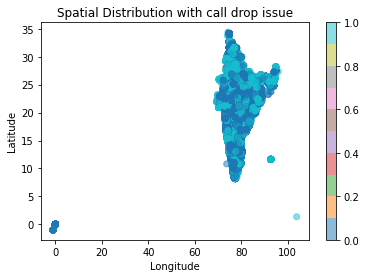

In [266]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'latitude', 'longitude', and 'target' columns
plt.scatter(combined_df['longitude'], combined_df['latitude'], c=combined_df['call_drop_issue'],cmap='tab10',alpha=0.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution with call drop issue')
plt.show()


#### further analysis with respect to latitude and longitude

In [267]:
combined_df['latitude'].quantile([0.25, 0.5, 0.75, 0.9, 1.0])

0.25    -1.000000
0.50    17.632826
0.75    22.827067
0.90    26.959622
1.00    34.374122
Name: latitude, dtype: float64

In [268]:
combined_df['latitude_bkt'] = pd.cut(combined_df['latitude'],bins=[-1, 17, 22, 26, 42])

In [269]:
combined_df['latitude_bkt'].value_counts()

(17, 22]    42904
(22, 26]    38141
(26, 42]    32927
(-1, 17]    30910
Name: latitude_bkt, dtype: int64

In [270]:
combined_df.groupby('latitude_bkt')['call_drop_issue'].mean()

latitude_bkt
(-1, 17]    0.242543
(17, 22]    0.309062
(22, 26]    0.199549
(26, 42]    0.423938
Name: call_drop_issue, dtype: float64

1. If latitude is higher than 26, there are higher chances of (42%) call drop issue(either poor quality or call drop)
2. In the bucket of latitude 22 to 26, there is lesser chance of call drop issue.

In [271]:
combined_df['longitude'].quantile([0, 0.25, 0.5, 0.75, 0.9, 1.0])

0.00     -1.000000
0.25     -1.000000
0.50     75.372435
0.75     78.748581
0.90     84.144142
1.00    103.793055
Name: longitude, dtype: float64

In [272]:
combined_df['longitude_bkt'] = pd.cut(combined_df['longitude'],bins=[-180, -2, -1, 75, 78, 85, 104])

In [273]:
combined_df.groupby('longitude_bkt')['call_drop_issue'].mean()

longitude_bkt
(-180, -2]         NaN
(-2, -1]      0.365892
(-1, 75]      0.356019
(75, 78]      0.341504
(78, 85]      0.220883
(85, 104]     0.228587
Name: call_drop_issue, dtype: float64

1. In the bucket of 78 to 104 there are lesser chances of call drop issue.

#### In out travelling analysis

In [274]:
inout_df = pd.DataFrame(combined_df['in_out_travelling'].value_counts(normalize=True).reset_index().rename(columns={'index':'in_out_travelling','in_out_travelling':'proportion'}))

In [275]:
inout_drop = combined_df.groupby('in_out_travelling')['call_drop_category'].value_counts(normalize=True)
inouot_drop_df = inout_drop.unstack(fill_value=0)
inouot_drop_df.sort_values(by='Satisfactory',ascending=False)

call_drop_category,Call Dropped,Poor Voice Quality,Satisfactory
in_out_travelling,,,
Travelling,0.063828,0.219523,0.716648
Indoor,0.108893,0.197018,0.694089
Outdoor,0.111808,0.248375,0.639818


In [276]:
inouot_drop_df = pd.merge(inouot_drop_df, inout_df, on='in_out_travelling')

In [277]:
inouot_drop_df.sort_values(by='proportion',ascending=False)

,in_out_travelling,Call Dropped,Poor Voice Quality,Satisfactory,proportion
0,Indoor,0.108893,0.197018,0.694089,0.693908
1,Outdoor,0.111808,0.248375,0.639818,0.235391
2,Travelling,0.063828,0.219523,0.716648,0.070702


1. Supprisigly for Travelling there are on an average only 6% of call drop issues raised.
2. For Outdoor, there is highest chance of 24% of Poor Voice quality.

### Monthly analysis

In [281]:
month_df = pd.DataFrame(combined_df['month'].value_counts(normalize=True).reset_index().rename(columns={'index':'month','month':'proportion'}))

In [282]:
month_df

,month,proportion
0,January,0.165438
1,February,0.115350
2,December,0.098509
3,November,0.096682
4,March,0.091260
5,April,0.070816
6,June,0.065659
7,May,0.064741
8,July,0.062147
9,August,0.059808


In [280]:
month_drop = combined_df.groupby('month')['call_drop_category'].value_counts(normalize=True)
month_drop_df = month_drop.unstack(fill_value=0)
month_drop_df.sort_values(by='Satisfactory',ascending=False)

call_drop_category,Call Dropped,Poor Voice Quality,Satisfactory
month,,,
November,0.041763,0.088487,0.869750
December,0.049937,0.100153,0.849910
January,0.087327,0.214826,0.697846
April,0.115325,0.216718,0.667957
March,0.083183,0.251552,0.665265
February,0.093965,0.243328,0.662707
October,0.108365,0.259309,0.632326
May,0.152533,0.229505,0.617962
June,0.154713,0.243130,0.602157


In [283]:
month_drop_df = pd.merge(month_drop_df, month_df, on='month')

In [284]:
month_drop_df.sort_values(by='proportion',ascending=False)

,month,Call Dropped,Poor Voice Quality,Satisfactory,proportion
4,January,0.087327,0.214826,0.697846,0.165438
3,February,0.093965,0.243328,0.662707,0.115350
2,December,0.049937,0.100153,0.849910,0.098509
9,November,0.041763,0.088487,0.869750,0.096682
7,March,0.083183,0.251552,0.665265,0.091260
0,April,0.115325,0.216718,0.667957,0.070816
6,June,0.154713,0.243130,0.602157,0.065659
8,May,0.152533,0.229505,0.617962,0.064741
5,July,0.203366,0.259738,0.536895,0.062147
1,August,0.161143,0.253628,0.585230,0.059808


1. Satisfactory rate is very less in the months of July, August & September. This is possible due to rainy season.
2. Satisfactory rate is very good in the months of November and December above 80%.
3. In the months of May and June call dropped issue is really high.

### Multivariate analysis

In [289]:
# This function uses pivot talbe to draw impact of two categorical columns on third column.

def pivot_table(df, values, index, columns):
    xxx = pd.pivot_table(df, values=values, index=index,
                         columns=columns, aggfunc='mean')
    title = index.title() + ' vs' + columns.title() + ' wrt ' + values.title()
    plt.figure(figsize=(8, 8))
    fig = sns.heatmap(xxx, annot=True,cmap='RdBu_r',linecolor="yellow",linewidths=2)
    fig.set(title=title)
    plt.xlabel(columns)
    plt.ylabel(index)
    plt.show()
    
    plt.figure(figsize=(16, 14))
    title1 = index.title() + ' vs' + columns.title() + ' wrt ' + values.title() + ' call drop issue'
#     plt.figure(figsize=(8, 8))
    fig1 = pd.pivot_table(df[df[values] == 1], values=values, index=index,
                        columns=columns, aggfunc='count').plot.bar()
    fig1.set(title=title1)                    
    plt.xlabel(index)
    plt.ylabel(columns)
    plt.show()
    
    plt.figure(figsize=(16, 14))
    title2 = index.title() + ' vs' + columns.title() + ' wrt ' + values.title() + ' satisfactory'
#     plt.figure(figsize=(8, 8))
    fig2 = pd.pivot_table(df[df[values] == 0], values=values, index=index,
                        columns=columns, aggfunc='count').plot.bar()
    fig2.set(title=title2)
    plt.xlabel(index)
    plt.ylabel(columns)
    plt.show()


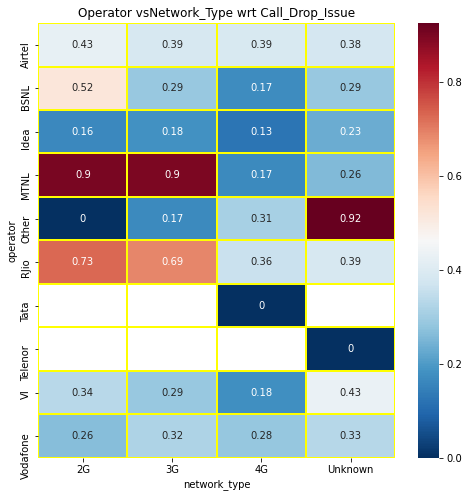

<Figure size 1152x1008 with 0 Axes>

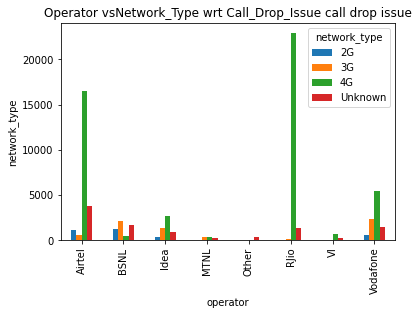

<Figure size 1152x1008 with 0 Axes>

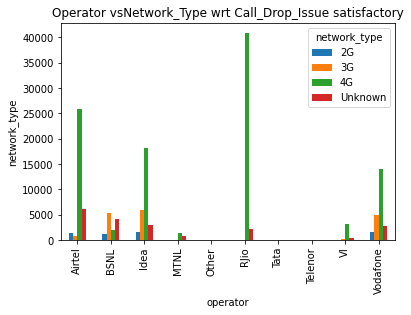

In [290]:
pivot_table(combined_df, 'call_drop_issue','operator', 'network_type')

1. For RJio call drop issue is highest for 2G and 3G services (about 70%) which is double than that of 4G service(35%).
2. For 4G services Idea has lowest call drop issue(13%) indicates Idea provides good 4G services.
3. Rjio & Airtel 4G services gets more number of call drop issues.


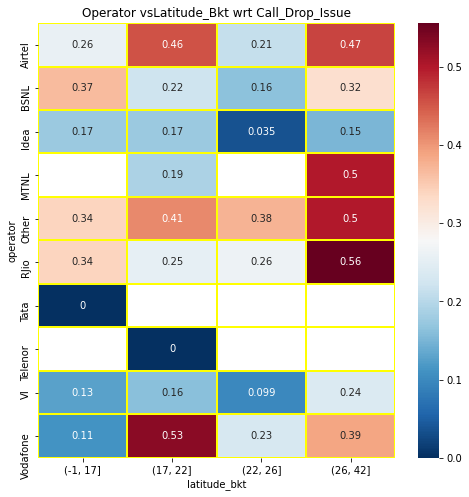

<Figure size 1152x1008 with 0 Axes>

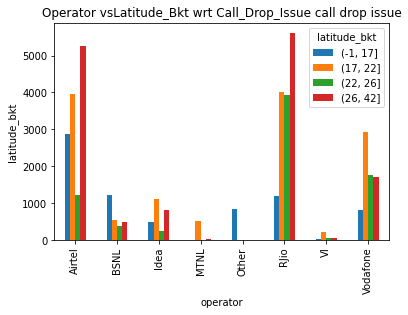

<Figure size 1152x1008 with 0 Axes>

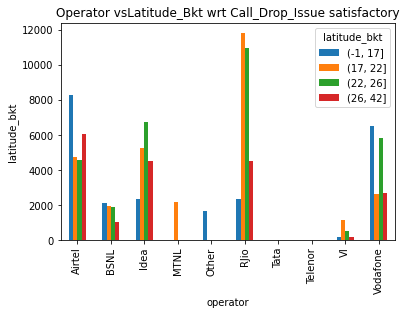

In [291]:
pivot_table(combined_df, 'call_drop_issue','operator', 'latitude_bkt')

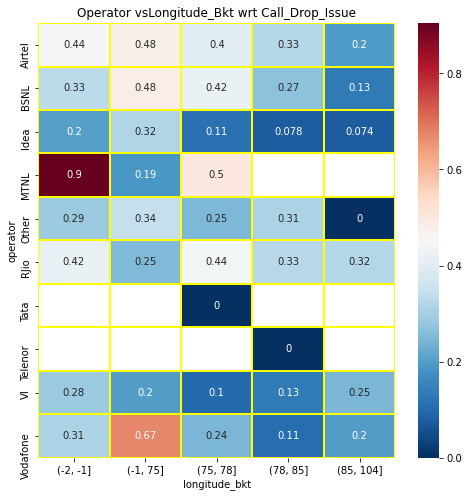

<Figure size 1152x1008 with 0 Axes>

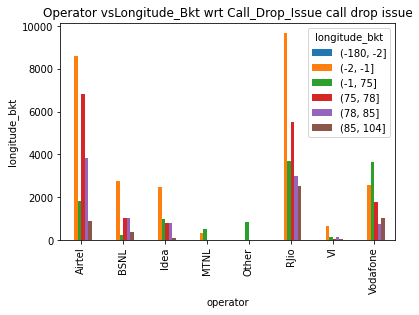

<Figure size 1152x1008 with 0 Axes>

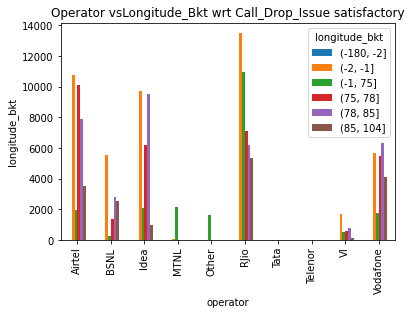

In [292]:
pivot_table(combined_df, 'call_drop_issue','operator', 'longitude_bkt')

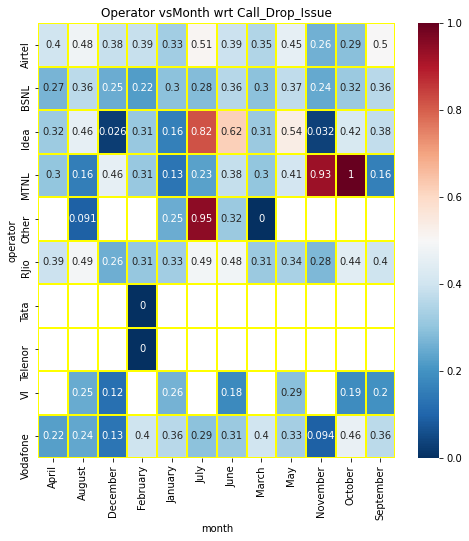

<Figure size 1152x1008 with 0 Axes>

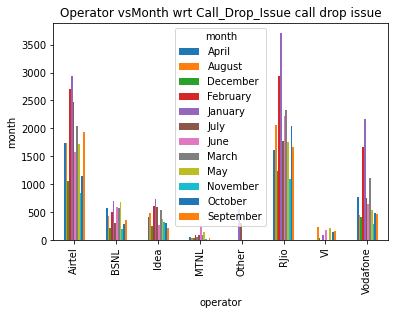

<Figure size 1152x1008 with 0 Axes>

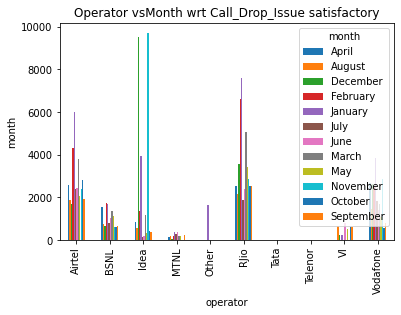

In [293]:
pivot_table(combined_df, 'call_drop_issue','operator', 'month')

1. In the month of July more number of call drop issues has been recorded.
